<a href="https://colab.research.google.com/github/Prabhakamaraj/ZEOTAP-1/blob/main/product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('/content/Products.csv')

In [27]:
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [28]:
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [29]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [30]:
print("\nMissing Values Count:")
print(data.isnull().sum())



Missing Values Count:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [31]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [32]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [33]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()


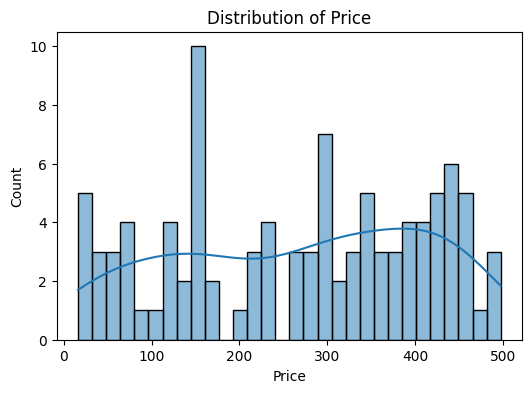

In [34]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [35]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()


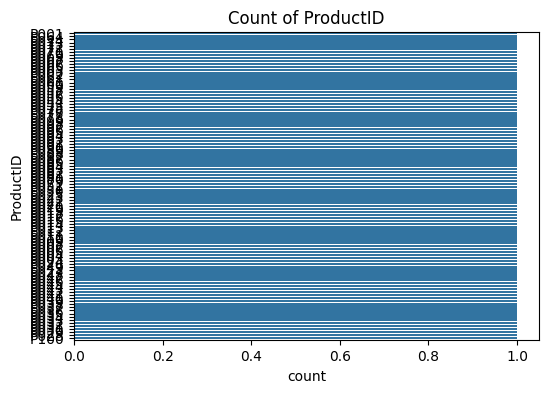

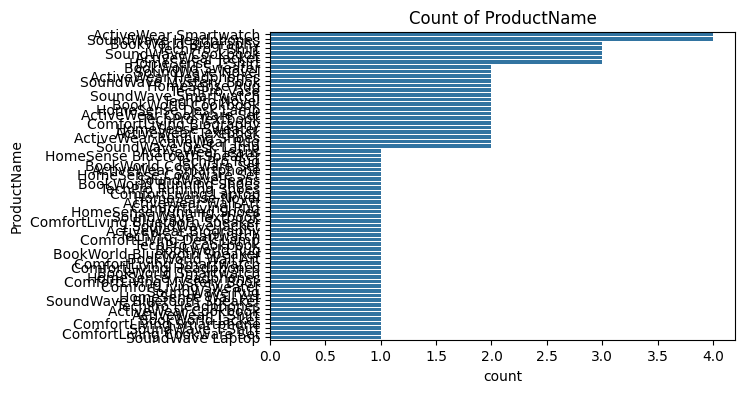

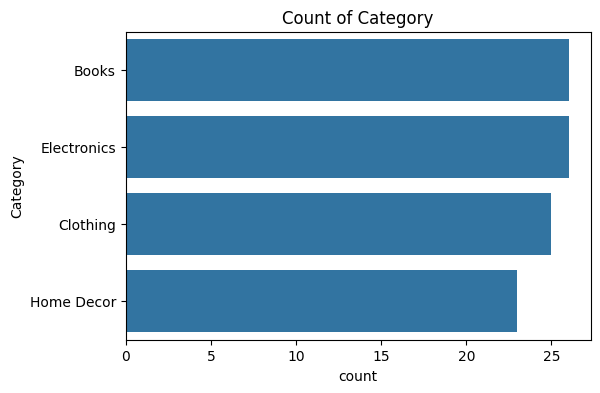

In [36]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()


In [37]:
numeric_data = data.select_dtypes(include=[np.number])

In [38]:
print(numeric_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes
None


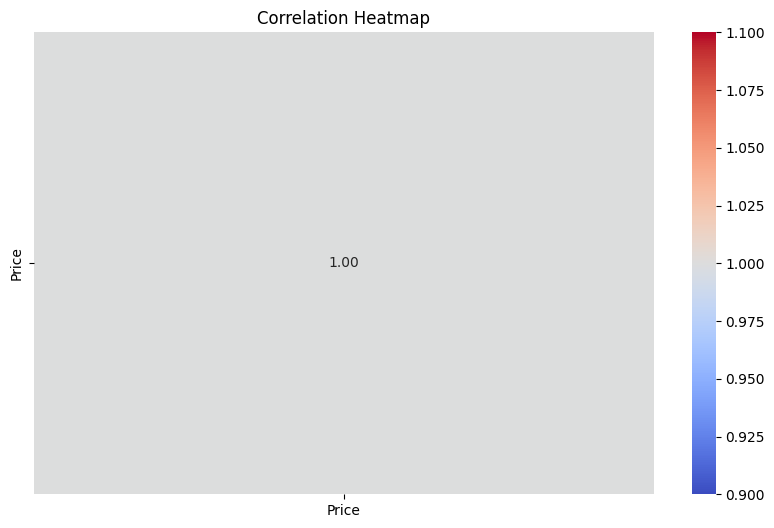

In [39]:
# Ensure the data has numeric columns
numeric_data = data.select_dtypes(include=[np.number])

if numeric_data.empty:
    print("No numeric data available for correlation analysis.")
else:
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


In [40]:
print(data.dtypes)


ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object


In [41]:
if len(numeric_columns) >= 2:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=numeric_columns[0], y=numeric_columns[1], data=data)
    plt.title(f"Scatter Plot: {numeric_columns[0]} vs {numeric_columns[1]}")
    plt.show()

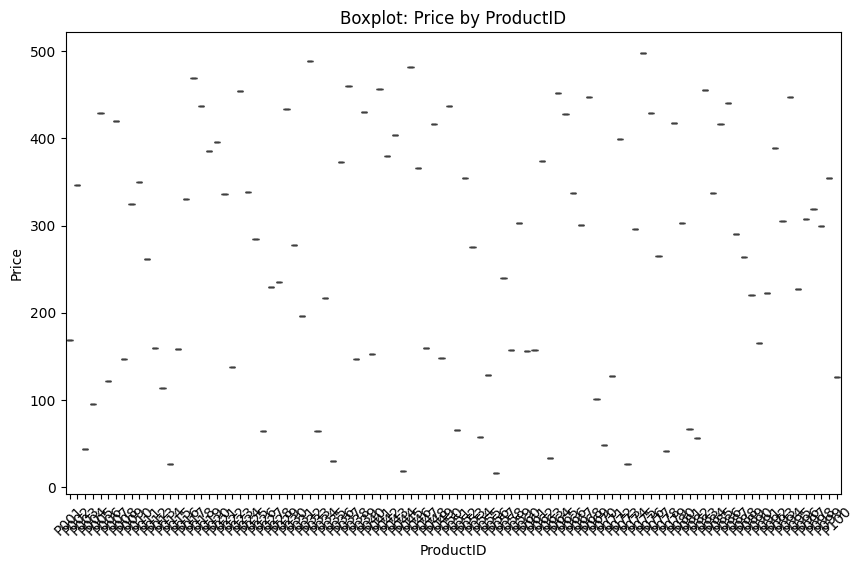

In [42]:
if categorical_columns and numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_columns[0], y=numeric_columns[0], data=data)
    plt.title(f"Boxplot: {numeric_columns[0]} by {categorical_columns[0]}")
    plt.xticks(rotation=45)
    plt.show()

In [43]:
if len(numeric_columns) > 1:
    sns.pairplot(data[numeric_columns])
    plt.title("Pair Plot for Numeric Features")
    plt.show()

In [44]:
print("\nKey Insights:")
print("- Look at the heatmap to identify highly correlated variables.")
print("- Review the boxplots for categorical vs numeric variables for trends.")
print("- Note outliers in histograms or boxplots.")



Key Insights:
- Look at the heatmap to identify highly correlated variables.
- Review the boxplots for categorical vs numeric variables for trends.
- Note outliers in histograms or boxplots.
